# Module4: Numpy, Pandas, Matplotlib
## Assignment:  Use-Case IV

In [1]:
#1  Load the Data
import pandas as pd
from matplotlib import pyplot as plt

# Load the data
sales_data = pd.read_csv('BigMartSalesData.csv')


# Print basic information about the data (Optional)
print("\nSales Data:\n-------------  ")
print(sales_data.info())  
print(sales_data.head())

# Filter data for the year 2011
sales_data_2011 = sales_data[sales_data['Year'] == 2011]




Sales Data:
-------------  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541874 entries, 0 to 541873
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541874 non-null  object 
 1   StockCode    541874 non-null  object 
 2   Description  540422 non-null  object 
 3   Quantity     541874 non-null  int64  
 4   UnitPrice    541874 non-null  float64
 5   Amount       541874 non-null  float64
 6   InvoiceDate  541874 non-null  object 
 7   Day          541874 non-null  int64  
 8   Month        541874 non-null  int64  
 9   Year         541874 non-null  int64  
 10  CustomerID   406829 non-null  float64
 11  Country      541874 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 49.6+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE M

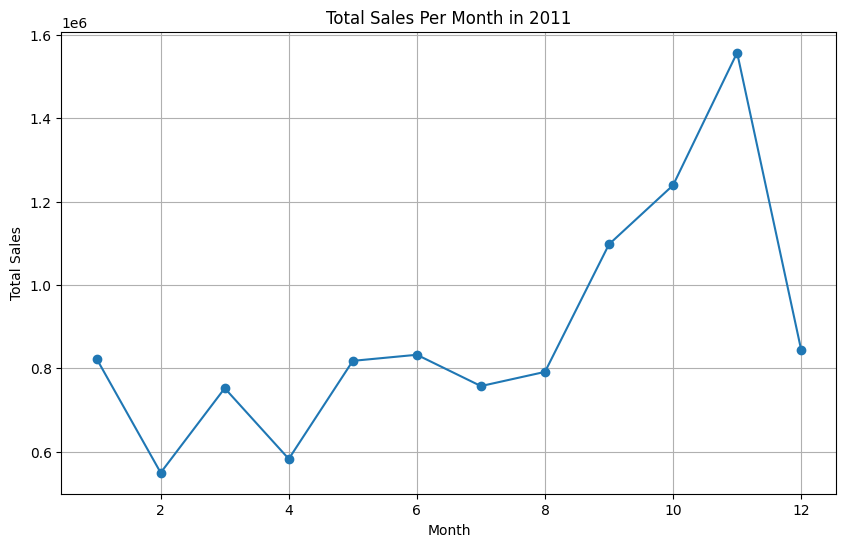

(np.int64(2), np.float64(549134.46))

In [2]:
#2. Plot Total Sales Per Month for the Year 2011
monthly_sales = sales_data_2011.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title("Total Sales Per Month in 2011")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Determine the month with the lowest sales
lowest_sales_month = monthly_sales.idxmin()
lowest_sales_value = monthly_sales.min()
lowest_sales_month, lowest_sales_value

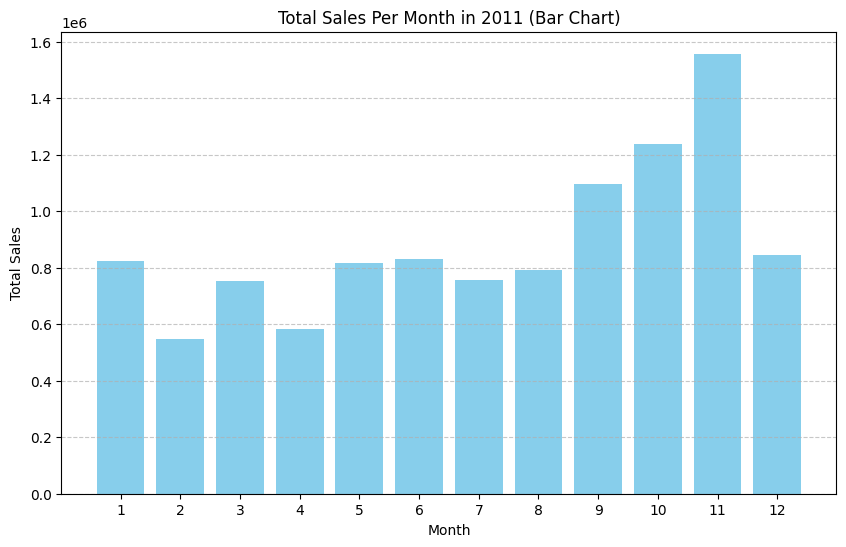

In [3]:
#3. Plot Total Sales Per Month for the Year 2011 as a Bar Chart

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue')
plt.title("Total Sales Per Month in 2011 (Bar Chart)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(monthly_sales.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

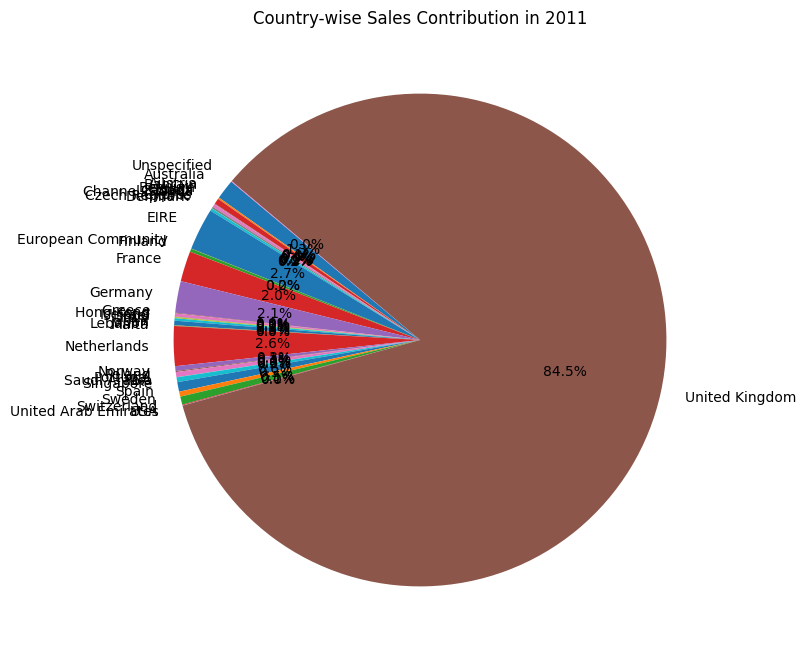

('United Kingdom', np.float64(8997901.674))

In [4]:
#3. Plot Pie Chart for the Year 2011 Country Wise
country_sales = sales_data_2011.groupby('Country')['Amount'].sum()

plt.figure(figsize=(12, 8))
plt.pie(country_sales, labels=country_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Country-wise Sales Contribution in 2011")
plt.show()

# Determine the country with the highest contribution to sales
highest_contributing_country = country_sales.idxmax()
highest_contributing_sales = country_sales.max()
highest_contributing_country, highest_contributing_sales

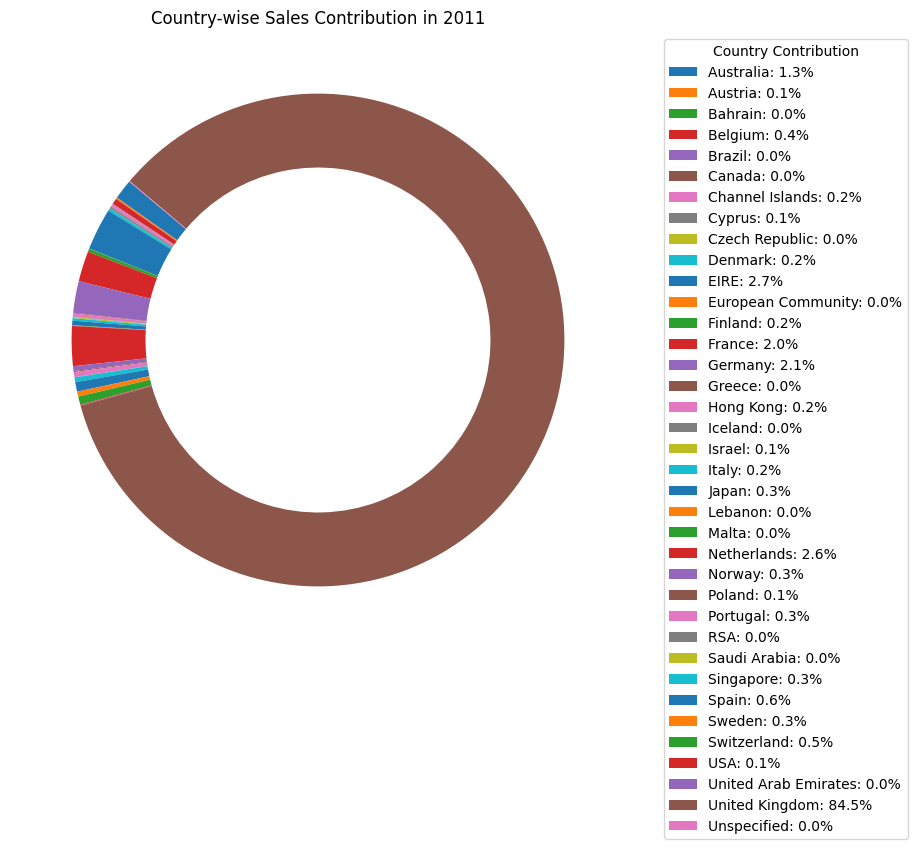

In [8]:
# Enhanced Pie Chart with Country Names and Percentages in the Legend

plt.figure(figsize=(12, 8))
plt.pie(
    country_sales, 
    labels=None,  # Remove direct labels from pie chart
    autopct=None, 
    startangle=140, 
    labeldistance=1.2,  # Adjust label distance
    wedgeprops=dict(width=0.3)  # Optional: use donut style for separation
)

# Create labels with both country names and percentages
country_labels = [f"{country}: {pct:.1f}%" for country, pct in zip(country_sales.index, 
                                                                   100 * country_sales / country_sales.sum())]

# Add legend with combined labels
plt.legend(country_labels, title="Country Contribution", bbox_to_anchor=(1.05, 1), loc="best")
plt.title("Country-wise Sales Contribution in 2011")
plt.show()

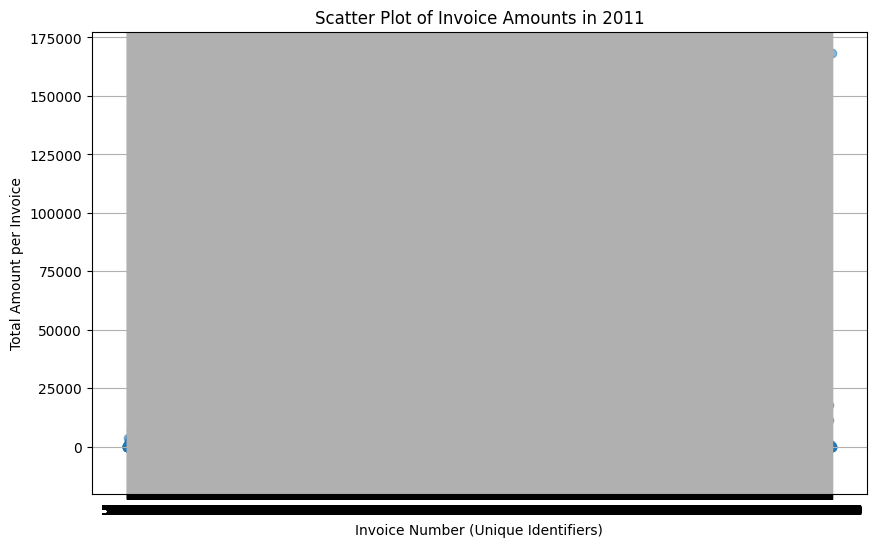

25%     44.5500
50%    220.0600
75%    424.2525
Name: Amount, dtype: float64

In [5]:
#5 # 4. Scatter Plot for Invoice Amounts

# Group by InvoiceNo to calculate the total amount for each invoice
invoice_totals = sales_data_2011.groupby('InvoiceNo')['Amount'].sum()

plt.figure(figsize=(10, 6))
plt.scatter(invoice_totals.index, invoice_totals.values, alpha=0.5)
plt.title("Scatter Plot of Invoice Amounts in 2011")
plt.xlabel("Invoice Number (Unique Identifiers)")
plt.ylabel("Total Amount per Invoice")
plt.grid(True)
plt.show()

# Determine the range where most invoice amounts are concentrated
invoice_amounts_concentration = invoice_totals.describe(percentiles=[0.25, 0.5, 0.75])
invoice_amounts_concentration[['25%', '50%', '75%']]

The scatter plot of invoice amounts reveals the concentration of amounts per invoice. 
Most of the invoice amounts are concentrated in the following ranges:

* 25th percentile: 44.55
* 50th percentile (median): 220.06
* 75th percentile: 424.25

This indicates that a significant portion of invoices have amounts below 425, with the majority falling near or below 220. 

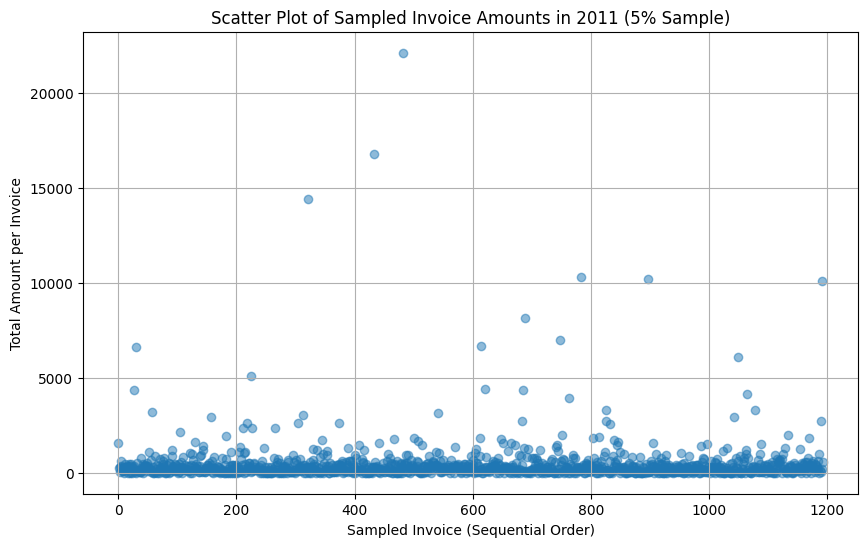

In [7]:
# Randomly sample 5% of the invoices for scatter plot visualization
sampled_invoices = invoice_totals.sample(frac=0.05) #, random_state=42)

# Plot Scatter Plot for the sampled Invoice Amounts
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sampled_invoices)), sampled_invoices.values, alpha=0.5)
plt.title("Scatter Plot of Sampled Invoice Amounts in 2011 (5% Sample)")
plt.xlabel("Sampled Invoice (Sequential Order)")
plt.ylabel("Total Amount per Invoice")
plt.grid(True)
plt.show()